# 5. Visualization & Reporting

This notebook focuses on creating compelling visualizations and synthesizing findings into a report. We will start by visualizing quantitative data.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the processed data file
processed_data_path = os.path.join('', '..', 'data', 'processed', 'immoweb_processed_data.csv')

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(processed_data_path)
    print('Processed data loaded successfully for visualization.')
    print('DataFrame Info:')
    df.info()
    print('First 5 rows:')
    display(df.head())
except FileNotFoundError:
    print(f'Error: The file was not found at {processed_data_path}')

Processed data loaded successfully for visualization.
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        75511 non-null  float64
 9   longitude                       75511 non-null  float64
 10  construction_year               75511 non-null  float64
 11  total_area_sqm         

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,price_log,total_area_sqm_log,surface_land_sqm_log,terrace_sqm_log,garden_sqm_log
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,MISSING,231.0,C,GAS,1,12.323860,4.615121,5.894403,1.791759,0.000000
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,MISSING,221.0,C,MISSING,1,13.014780,NaN,6.523562,0.000000,0.000000
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,AS_NEW,242.0,MISSING,GAS,0,12.721889,4.962845,5.894403,0.693147,0.000000
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,MISSING,99.0,A,MISSING,0,13.124363,5.236442,6.226537,0.000000,0.000000
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,50.900919,4.376713,...,AS_NEW,19.0,A+,GAS,0,13.798060,5.135798,5.894403,3.044522,4.962845


## T022: Create Appropriate Visuals for Quantitative Data

We will now create various visualizations to understand the distribution and characteristics of key quantitative variables. This includes histograms for distribution, box plots for outliers and spread, and potentially scatter plots for relationships between quantitative variables.

Visualizing distributions of key quantitative variables:


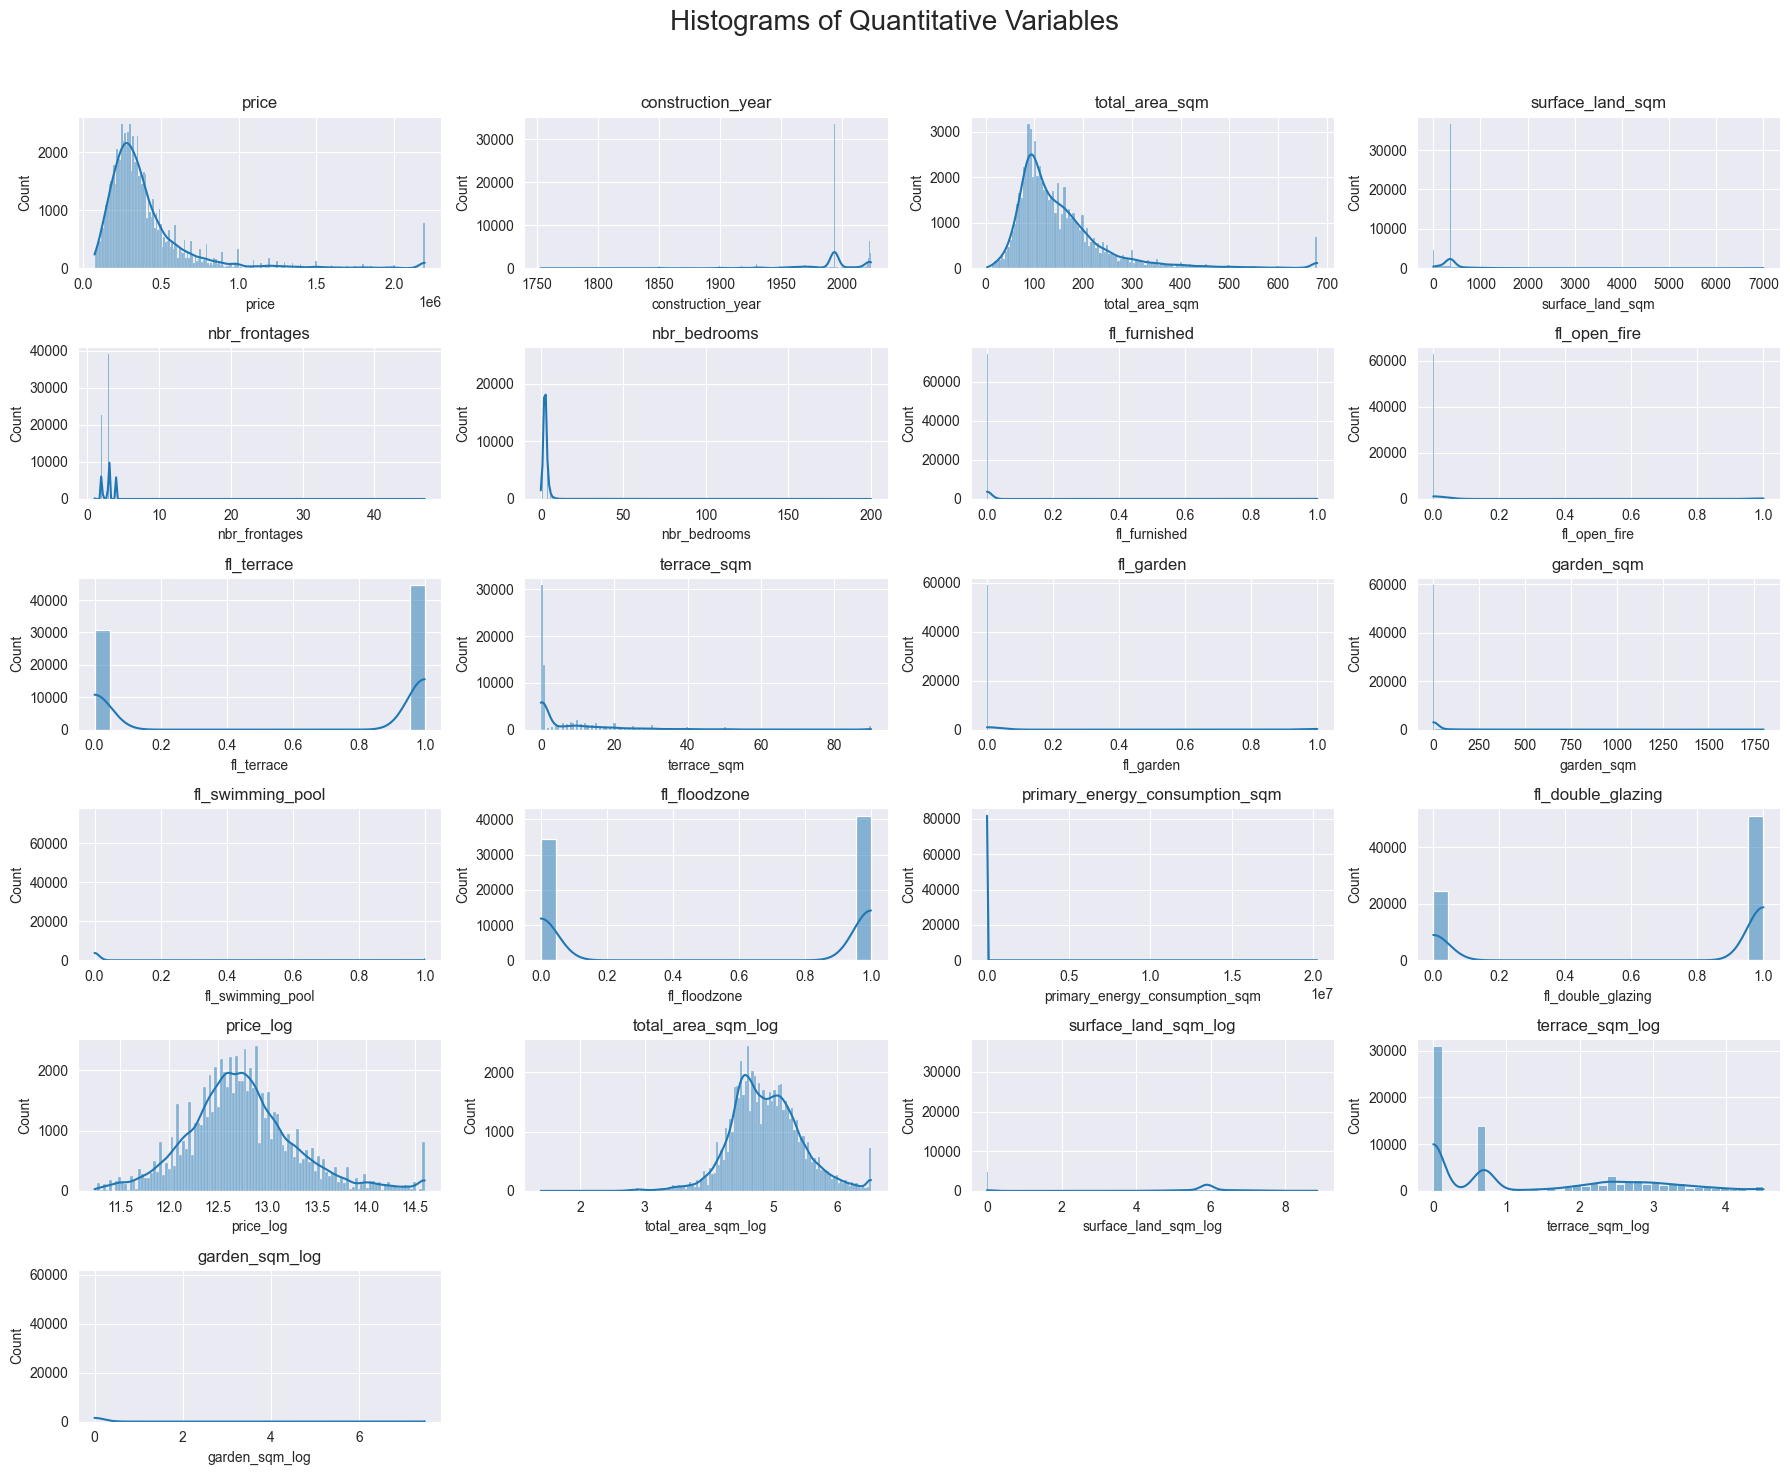

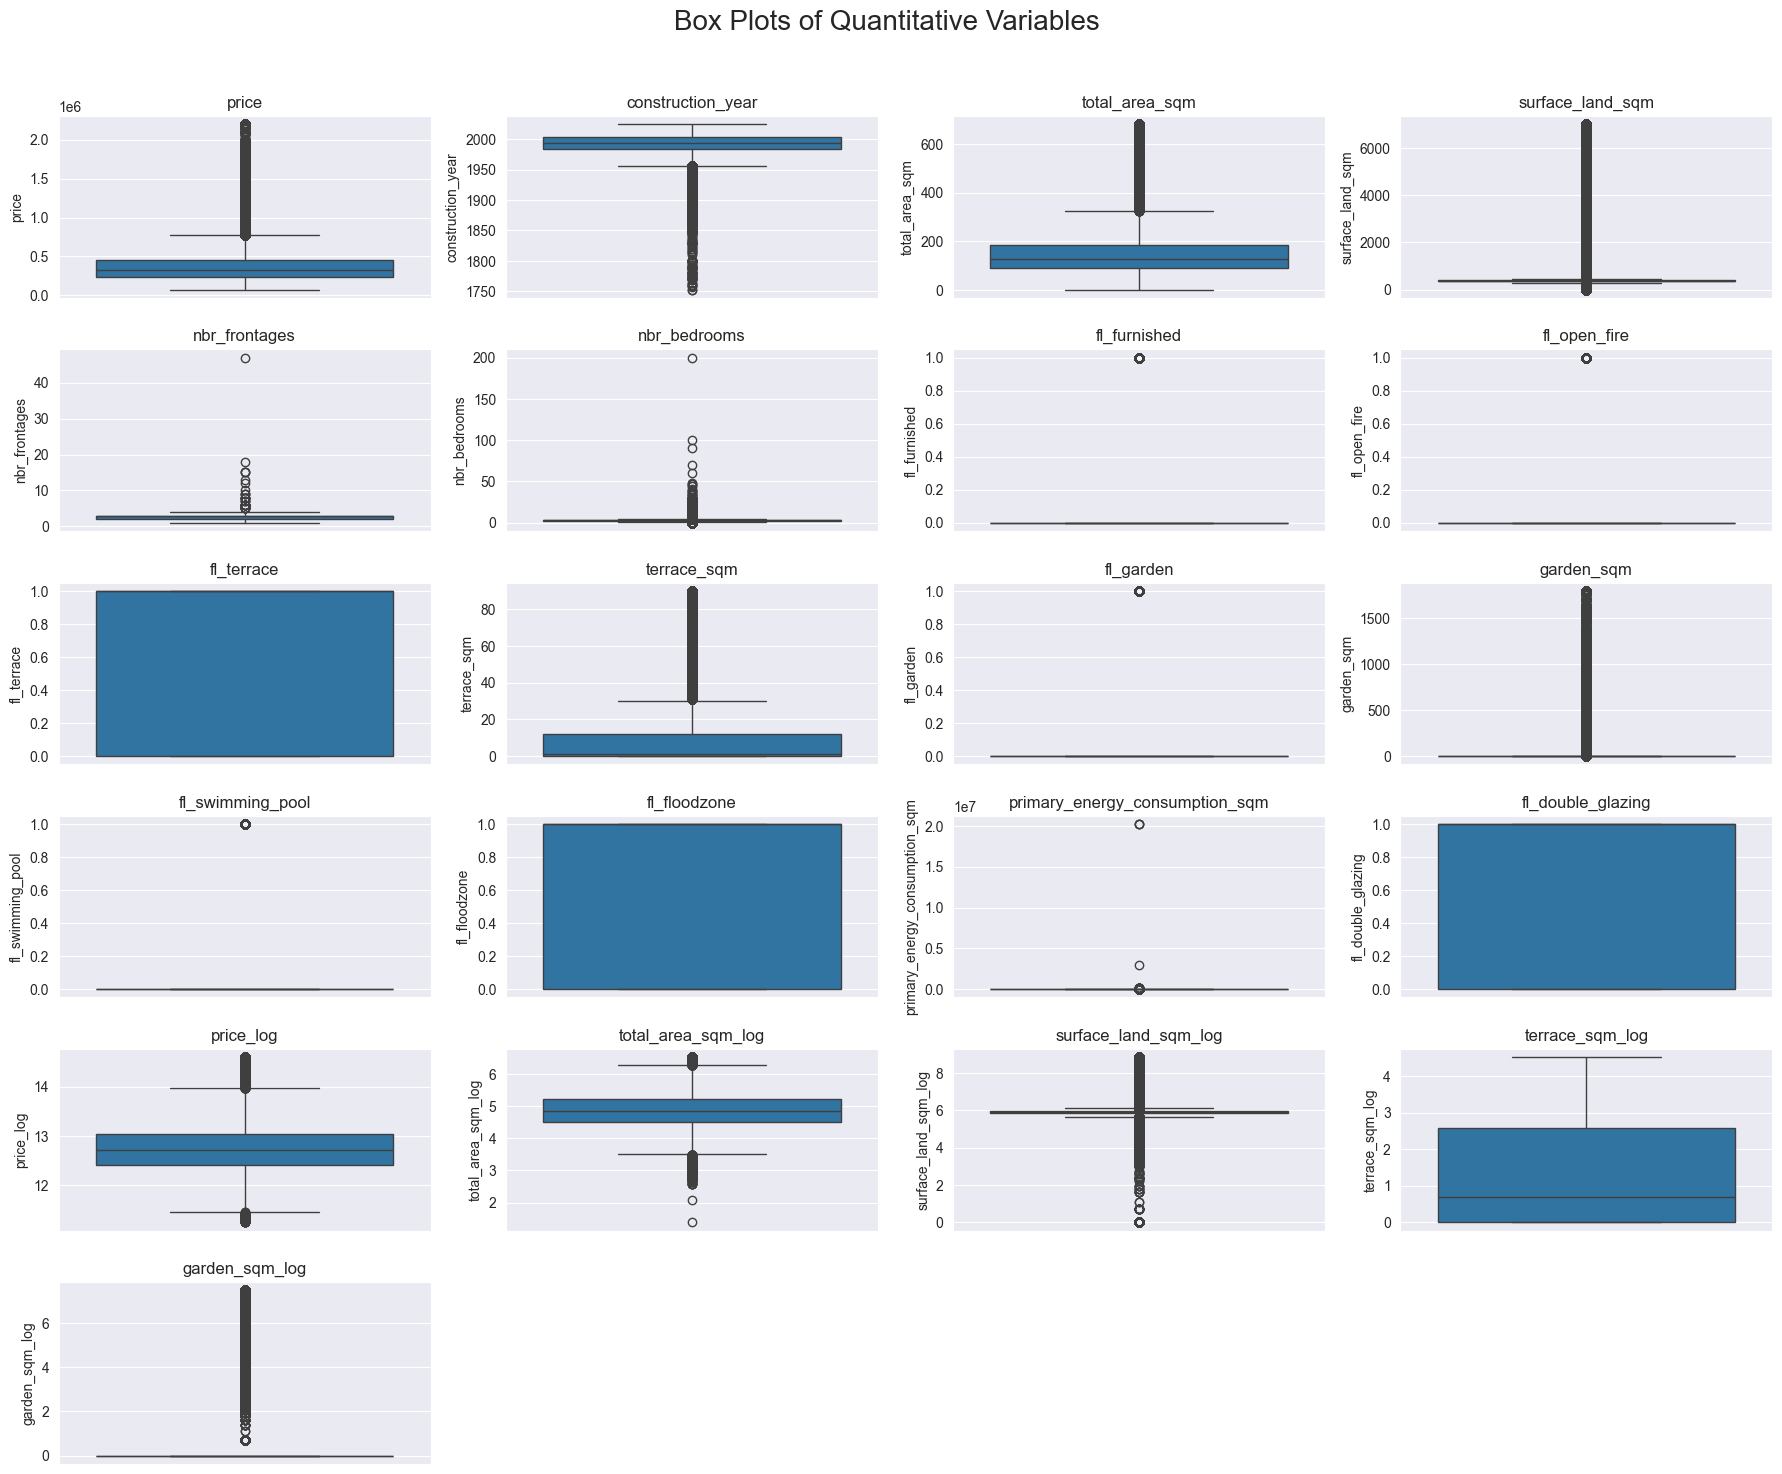

In [2]:
if 'df' in locals():
    quantitative_vars = df.select_dtypes(include=['number']).columns.tolist()
    
    # Exclude 'id' and 'zip_code' as they are identifiers/categorical in nature for visualization purposes
    # Also exclude latitude and longitude for general distribution plots, they are better for geographical plots
    vars_to_visualize = [var for var in quantitative_vars if var not in ['id', 'zip_code', 'latitude', 'longitude']]
    
    print("Visualizing distributions of key quantitative variables:")
    
    # Histograms for distribution
    plt.figure(figsize=(18, 15))
    plt.suptitle('Histograms of Quantitative Variables', fontsize=20)
    for i, var in enumerate(vars_to_visualize):
        plt.subplot(6, 4, i + 1) # Adjust subplot grid based on number of variables
        sns.histplot(df[var].dropna(), kde=True)
        plt.title(var)
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()
    
    # Box plots for outliers and spread
    plt.figure(figsize=(18, 15))
    plt.suptitle('Box Plots of Quantitative Variables', fontsize=20)
    for i, var in enumerate(vars_to_visualize):
        plt.subplot(6, 4, i + 1) # Adjust subplot grid based on number of variables
        sns.boxplot(y=df[var].dropna())
        plt.title(var)
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()
else:
    print("DataFrame 'df' not found. Please load the data first.")

## T023: Create Appropriate Visuals for Qualitative Data

We will now visualize the distribution of key qualitative (categorical) variables. This will help us understand the frequency and proportion of different categories within these variables.

Visualizing distributions of key qualitative variables:


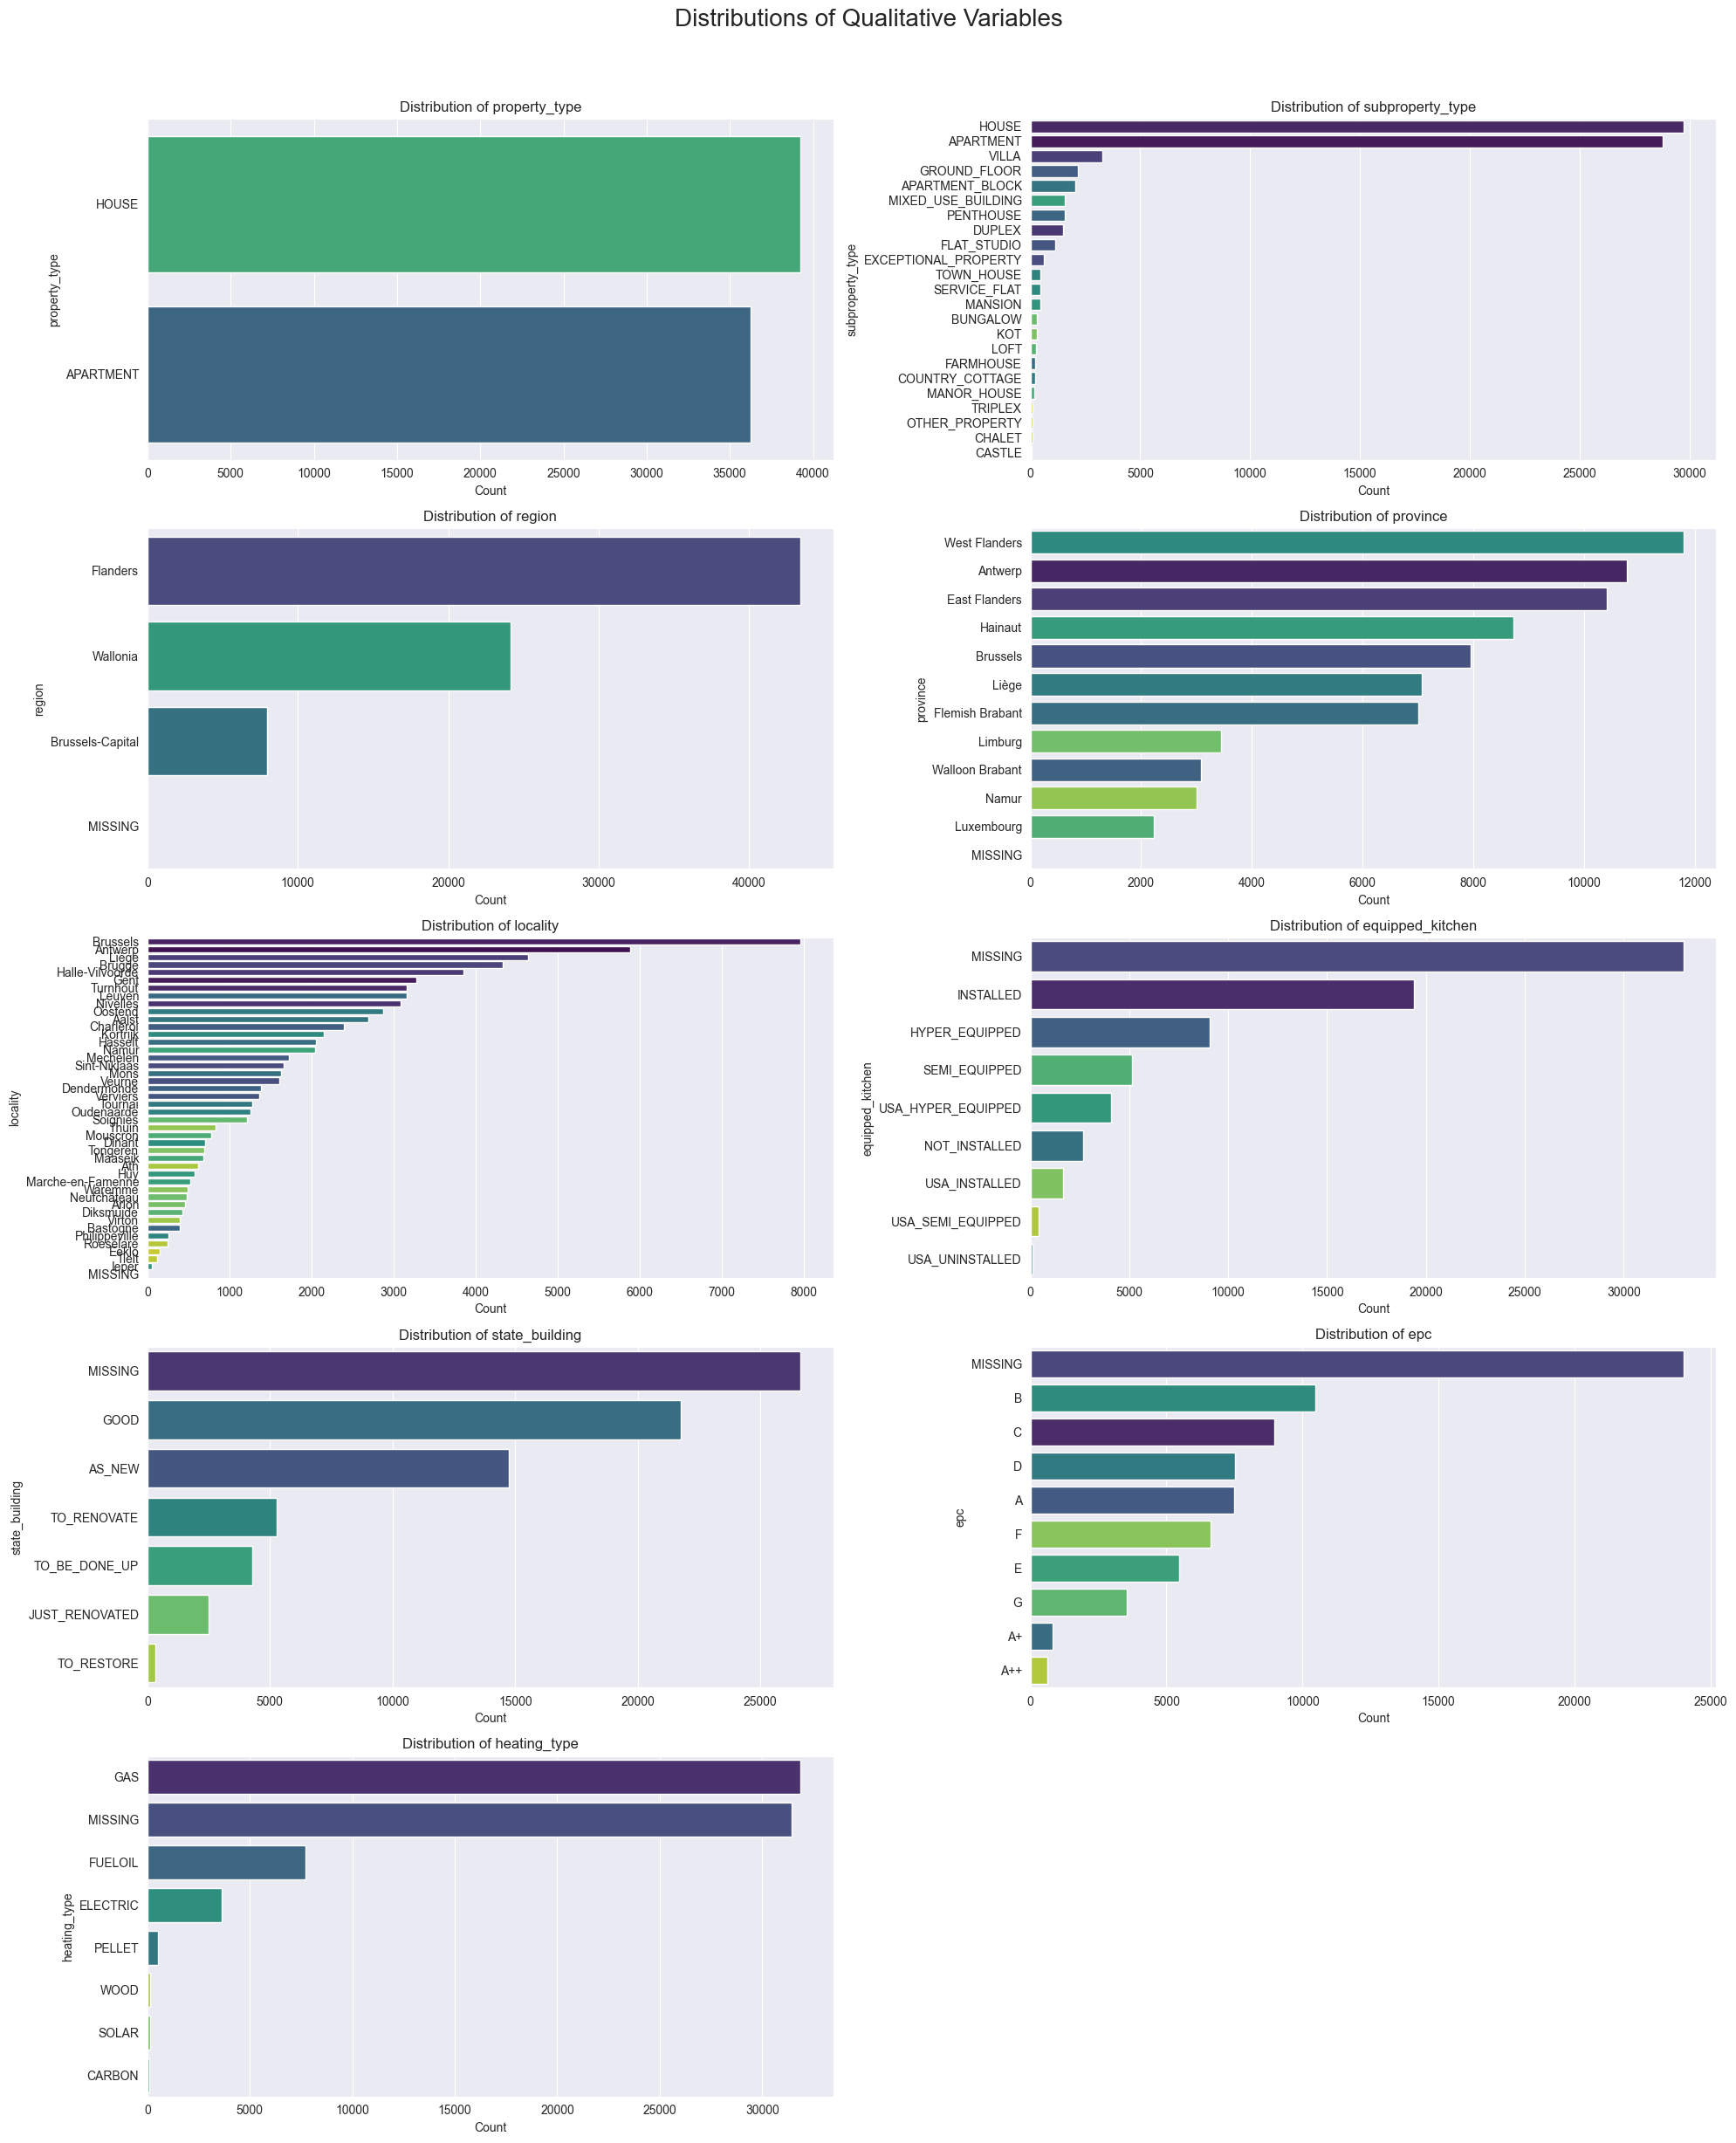

In [3]:
if 'df' in locals():
    qualitative_vars = df.select_dtypes(include=['object']).columns.tolist()
    
    print("Visualizing distributions of key qualitative variables:")
    
    plt.figure(figsize=(20, 25))
    plt.suptitle('Distributions of Qualitative Variables', fontsize=20)
    
    for i, var in enumerate(qualitative_vars):
        plt.subplot(5, 2, i + 1) # Adjust subplot grid based on number of variables
        sns.countplot(y=df[var], order=df[var].value_counts().index, palette='viridis', hue=df[var])
        plt.title(f'Distribution of {var}')
        plt.xlabel('Count')
        plt.ylabel(var)
    
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()
else:
    print("DataFrame 'df' not found. Please load the data first.")

## T024: Visualize Correlations Identified in Phase 4

We will now visualize the correlations between numerical variables using a heatmap. This provides a clear visual representation of how different variables relate to each other, helping to identify strong positive or negative relationships.

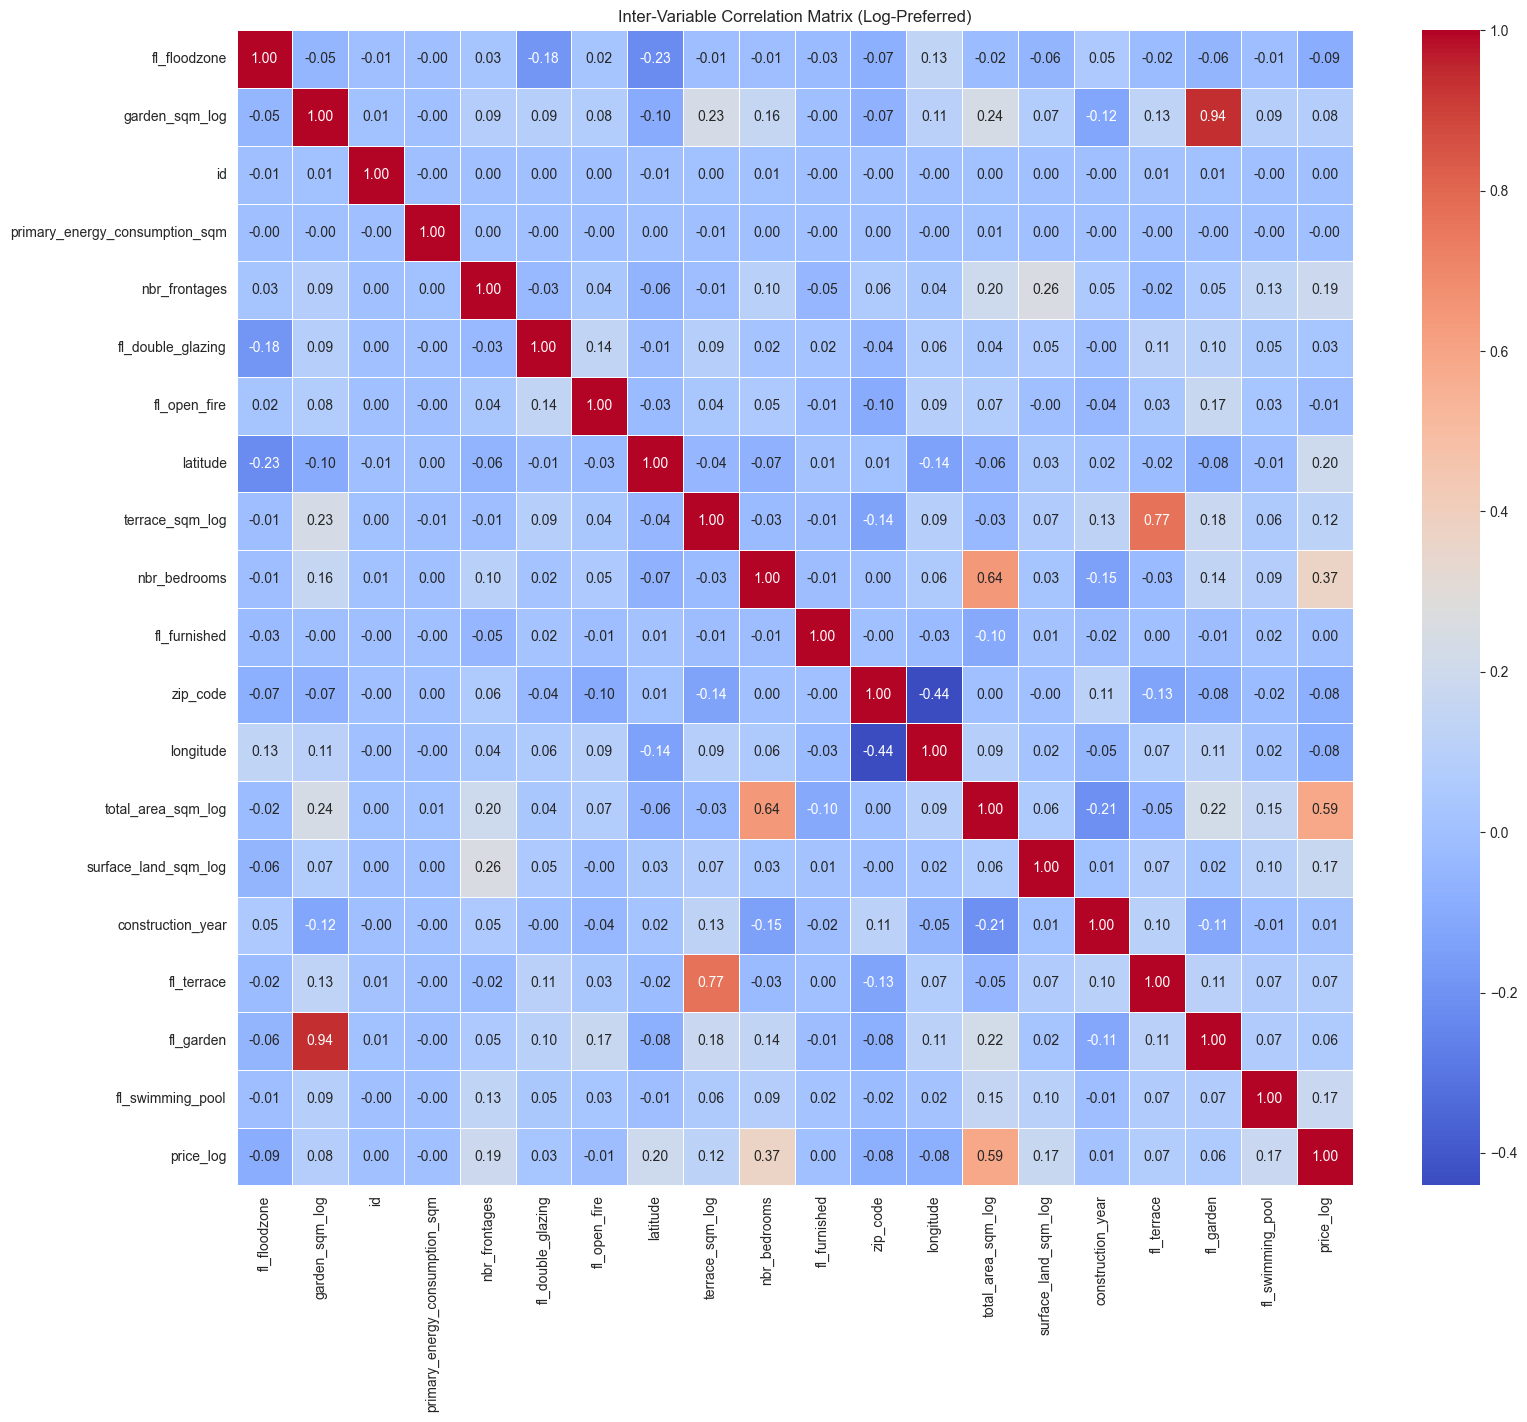

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


if 'df' in locals() and isinstance(df, pd.DataFrame):
    # 1. Select all numerical columns
    numerical_df = df.select_dtypes(include=['number'])
    numerical_cols = set(numerical_df.columns)

    cols_to_keep = set()

    for col in numerical_cols:
        is_log_col = col.endswith('_log')
        original_col_name = col.replace('_log', '')

        # Scenario 1: It's a log-transformed column (e.g., 'A_log')
        if is_log_col:
            # Always prefer and keep the log column if it exists.
            cols_to_keep.add(col)

        # Scenario 2: It's an original column (e.g., 'A')
        else:
            log_col_name = f'{col}_log'

            # Keep the original column ONLY if the log-transformed version doesn't exist
            if log_col_name not in numerical_cols:
                cols_to_keep.add(col)

    # 3. Create the final DataFrame for correlation
    final_df = df[list(cols_to_keep)]

    # 4. Calculate the correlation matrix
    corr_matrix = final_df.corr()

    # 5. Plotting the heatmap
    plt.figure(figsize=(18, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Inter-Variable Correlation Matrix (Log-Preferred)')
    plt.show()
else:
    print("DataFrame 'df' not found or is not a DataFrame. Please load the data first.")


## T025: Identify Five Most Important Variables and Justify

Based on the correlation analysis (Phase 4) and domain knowledge, we will identify the five most important variables that significantly influence property prices. The justification will be based on their correlation strength with `price` and their practical relevance in the real estate market.

From the correlation matrix with `price` (from T019 in `04_correlation_analysis.ipynb`):

1.  **`total_area_sqm`**: This variable shows a strong positive correlation with `price` (around 0.58). Intuitively, larger properties tend to be more expensive.
2.  **`nbr_bedrooms`**: There is a notable positive correlation with `price` (around 0.36). More bedrooms generally indicate a larger property suitable for more occupants, thus increasing its value.
3.  **`surface_land_sqm`**: This also has a positive correlation with `price` (around 0.33). The size of the land a property sits on is a significant factor in its overall value, especially for houses.
4.  **`garden_sqm`**: While not as strong as `total_area_sqm` or `nbr_bedrooms`, `garden_sqm` still shows a positive correlation (around 0.13). Properties with larger gardens are often more desirable and command higher prices.
5.  **`terrace_sqm`**: Similar to `garden_sqm`, `terrace_sqm` has a positive correlation (around 0.11). A larger terrace can add significant value, particularly in urban areas.

Other variables like `construction_year` show a weak negative correlation, suggesting older properties might be slightly less expensive, but this relationship is not very strong. `primary_energy_consumption_sqm` has a very weak correlation, indicating it might not be a primary driver of price in this dataset, or its impact is more nuanced.

## T026: Analyze and Visualize Least/Most Expensive Municipalities

We will now identify and visualize the municipalities with the highest and lowest average property prices. This analysis can reveal geographical pricing trends and highlight areas of particular interest.


Top 10 Most Expensive Municipalities (Average Price):


locality
MISSING            802000.000000
Brugge             730795.371012
Brussels           515538.684217
Halle-Vilvoorde    478073.868640
Gent               476684.979218
Nivelles           472786.954987
Leuven             443765.858592
Antwerp            424157.464286
Mechelen           422961.251303
Veurne             414091.526381
Name: price, dtype: float64


Top 10 Least Expensive Municipalities (Average Price):


locality
Dinant           296689.671875
Neufchâteau      295747.747368
Liège            295611.506045
Soignies         291697.168874
Ieper            286931.785714
Mouscron         274197.175032
Thuin            261277.514458
Philippeville    258126.712062
Mons             254661.235438
Charleroi        239046.066946
Name: price, dtype: float64

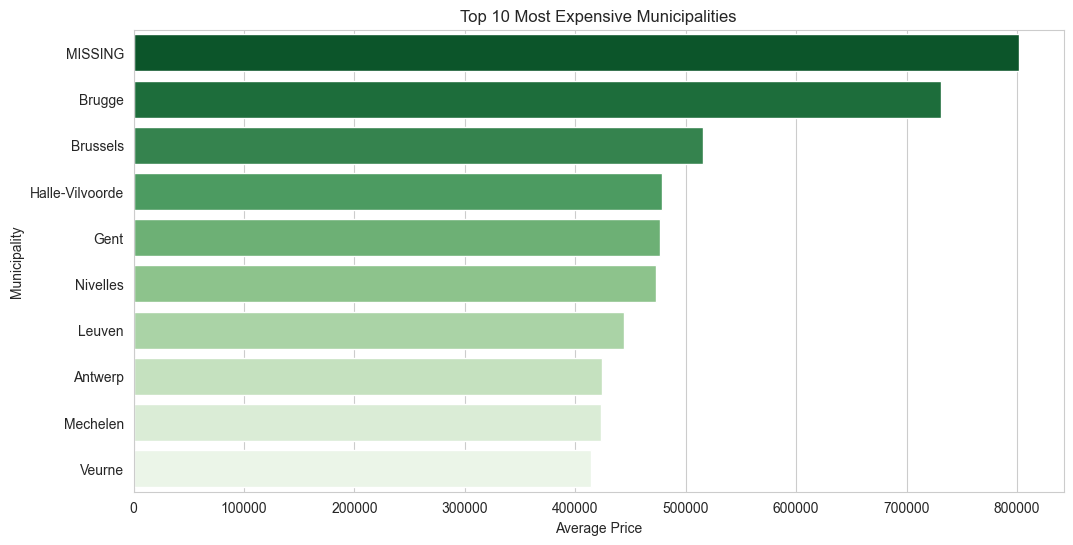

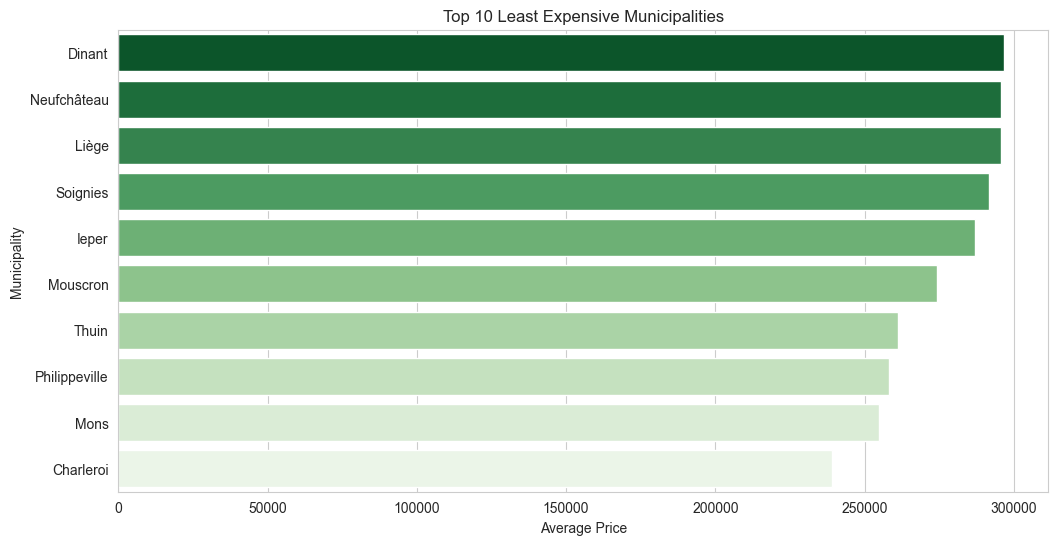

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Assuming you need this for display()

# Set the style globally for white background
sns.set_style("whitegrid")

# Define the greenish palette
greenish_palette = 'Greens_r'

# Define the file format/extension for convenience
FILE_FORMAT = 'png'
DPI_SETTING = 300 # High resolution for quality saving

if 'df' in locals():
    # Calculate average price per locality (same as before)
    avg_price_by_locality = df.groupby('locality')['price'].mean().sort_values(ascending=False)
    top_10_expensive = avg_price_by_locality.head(10)
    top_10_least_expensive = avg_price_by_locality.tail(10)

    print("\nTop 10 Most Expensive Municipalities (Average Price):")
    display(top_10_expensive)

    print("\nTop 10 Least Expensive Municipalities (Average Price):")
    display(top_10_least_expensive)

    # 🏡 Visualize the top 10 most expensive municipalities
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_10_expensive.values,
        y=top_10_expensive.index,
        palette=greenish_palette,
        hue=top_10_expensive.index,
        legend=False
    )
    plt.title('Top 10 Most Expensive Municipalities')
    plt.xlabel('Average Price')
    plt.ylabel('Municipality')

    # --- SAVE THE FIGURE as PNG ---
    plt.savefig(
        f'top_10_expensive_municipalities.{FILE_FORMAT}',
        dpi=DPI_SETTING,
        bbox_inches='tight'
    )

    # --- DISPLAY THE FIGURE ---
    plt.show()

    # 💰 Visualize the top 10 least expensive municipalities
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_10_least_expensive.values,
        y=top_10_least_expensive.index,
        palette=greenish_palette,
        hue=top_10_least_expensive.index,
        legend=False
    )
    plt.title('Top 10 Least Expensive Municipalities')
    plt.xlabel('Average Price')
    plt.ylabel('Municipality')

    # --- SAVE THE FIGURE as PNG ---
    plt.savefig(
        f'top_10_least_expensive_municipalities.{FILE_FORMAT}',
        dpi=DPI_SETTING,
        bbox_inches='tight'
    )

    # --- DISPLAY THE FIGURE ---
    plt.show()
else:
    print("DataFrame 'df' not found. Please load the data first.")